# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = 2 \langle A^T (Ax - y), dx \rangle $$
$$ \nabla f(x) = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y)  = 0$$
$$ x =  (A^TA)^{-1}A^Ty$$

### 2.1 Реализация прямого решения

In [9]:
import numpy as np
import matplotlib.pyplot as plt

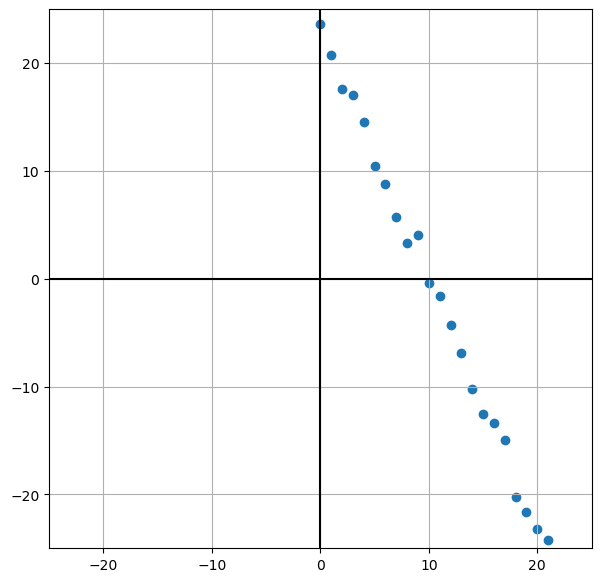

In [ ]:

#y = ax + b, ниже происходит генерация коэффициентов
a_orig = (-1)**23 * 0.1 * 23 # по формуле (-1)^n * 0.1 * n
b_orig = 23*(-1)**(23+1) # по формуле n*(-1)^(n+1)
random_state = 23 # х

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [11]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 23.66698806,  20.72581308,  17.62238059,  17.04863382,
         14.50167179,  10.44891844,   8.83245188,   5.76254031,
          3.27785248,   4.07225828,  -0.34745899,  -1.62985984,
         -4.27772848,  -6.83965707, -10.24345   , -12.50994188,
        -13.35826363, -14.97112315, -20.23806777, -21.63876863,
        -23.20184052, -24.25462872, -27.06183803, -29.08788133,
        -31.9588937 ]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - чтобы модель могла учесть свободный член (сдвиг) в уравнении прямой, если мы этого не сделаем, то все линии будут проходить через точку (0,0)

In [49]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат

a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
a, b = a_b_analytical
print("a =", a_b_analytical[0])
print("b =", a_b_analytical[1])


a = -2.2920453508001577
b = 22.878148489301406


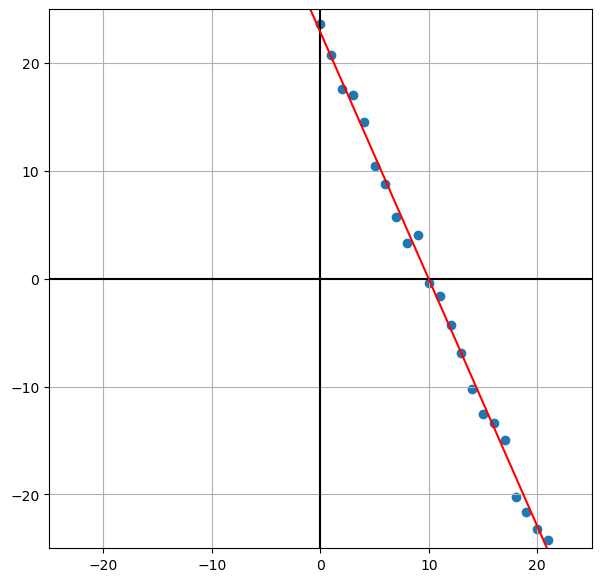

In [54]:
# постройте линию которая вышла рядом с изначальными данными
y1 = a * (-25) + b
y2 = a * 25 + b

# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
ax.plot([-25, 25], [y1, y2], color='red')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

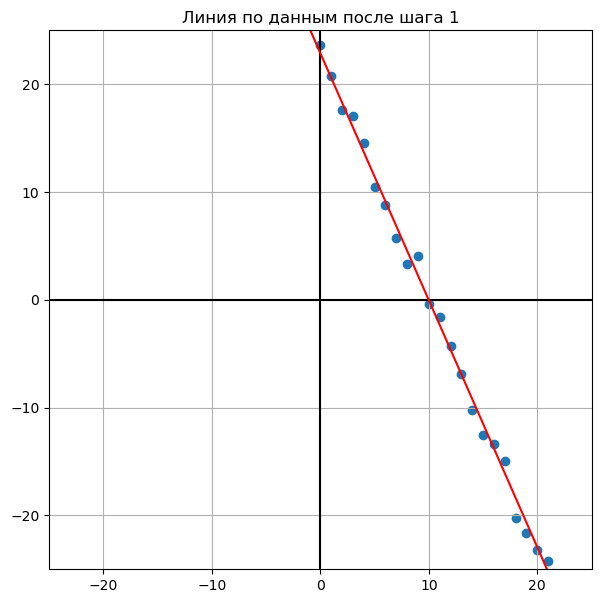

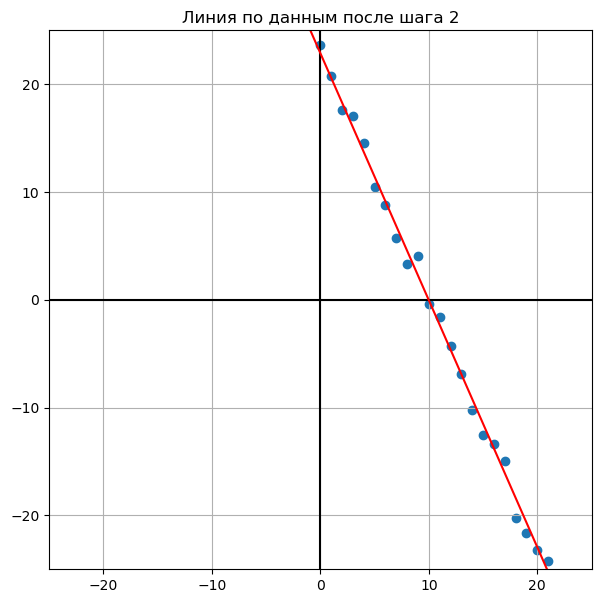

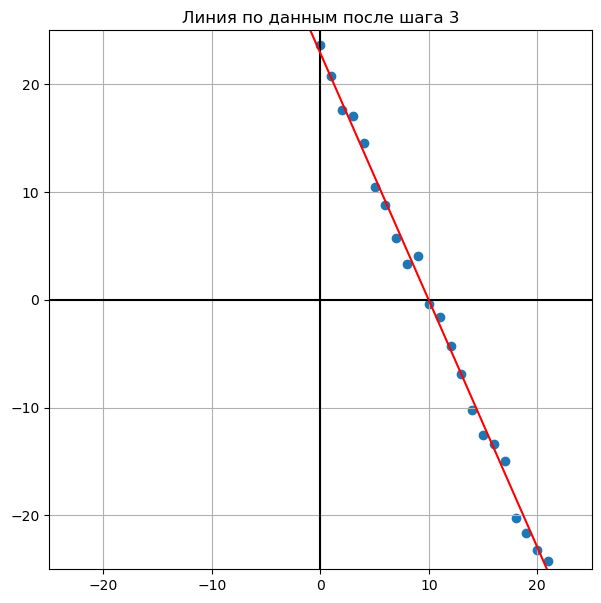

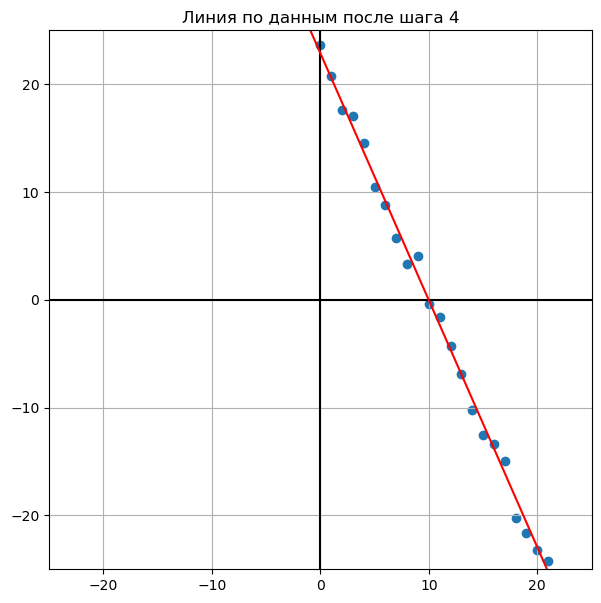

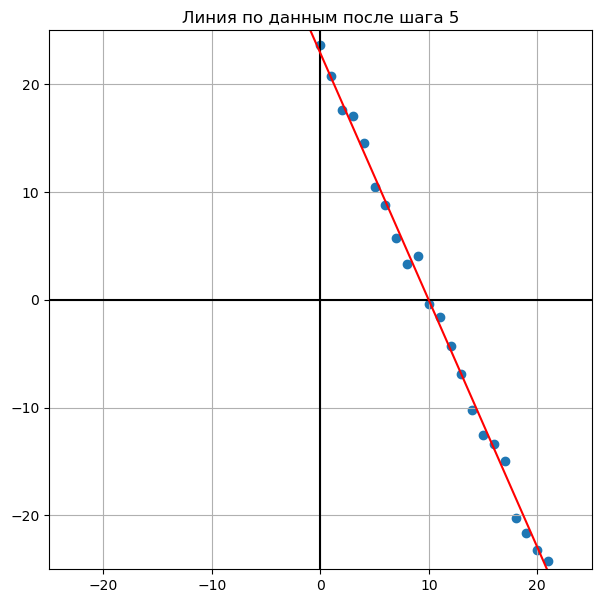

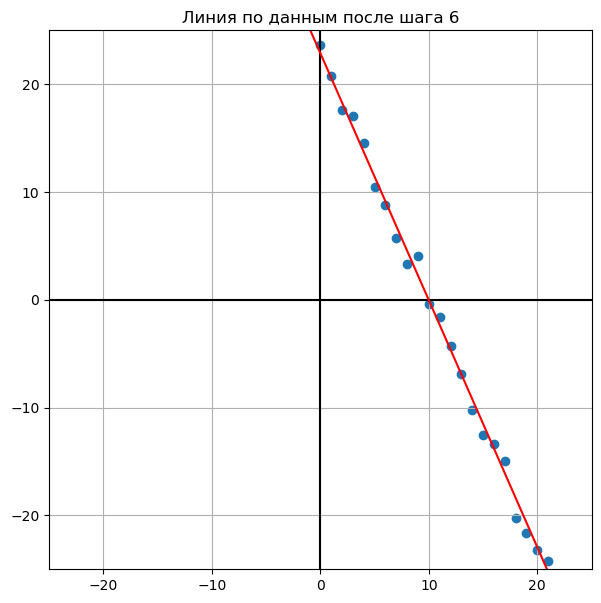

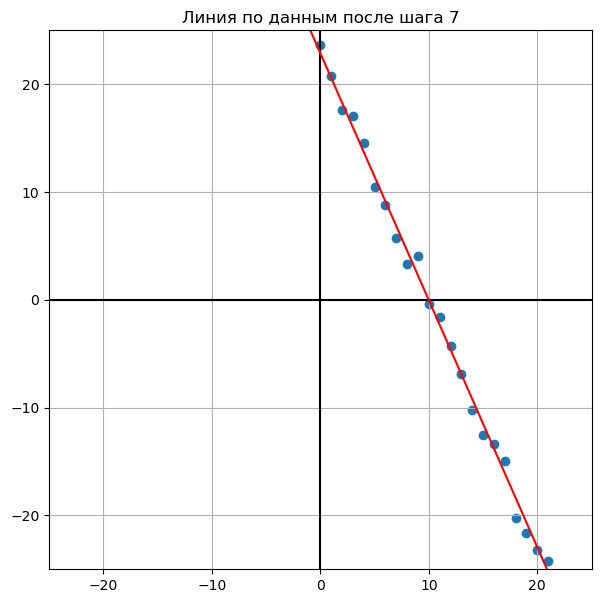

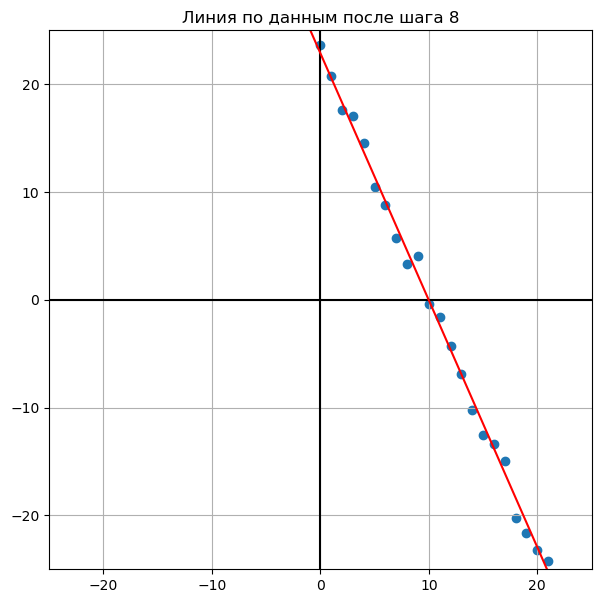

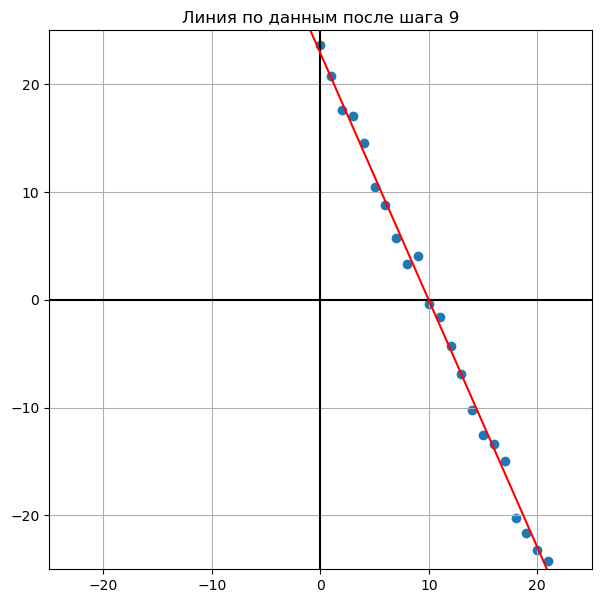

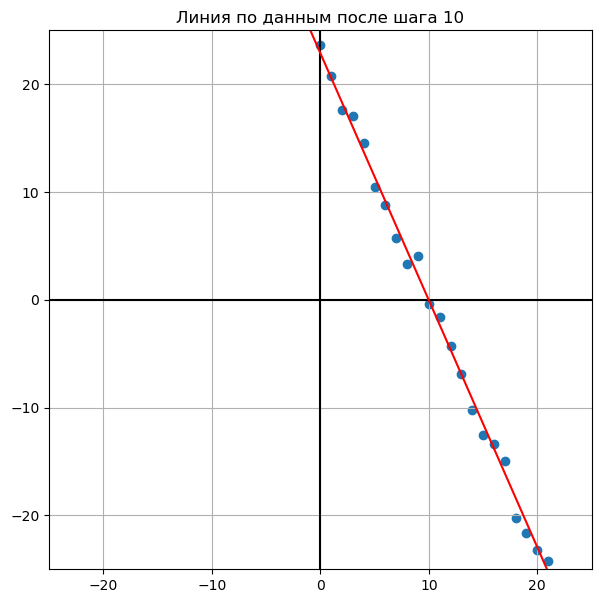

In [ ]:
alpha = 1

a_b_analytical = np.array([0.0, 0.0])

for i in range(10):
    # получаем градиент $$ \nabla f(x) = 2A^T(Ax-y) $$
    grad = 2 * A.T @ (A @ a_b_analytical - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b_analytical += alpha * antigrad
    
    # рисуем результат текущего шага
    y1 = a * (-25) + b
    y2 = a * 25 + b
    #  - изначальные данные
    f, ax = plt.subplots(figsize=(7, 7))

    plt.scatter(A[:, 0], y)
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axvline(0, color='black')
    ax.axhline(0, color='black')
    ax.grid(True)

    # - линия которая обучилась
    ax.plot([-25, 25], [y1, y2], color = 'red')

    ax.set_title(f'Линия по данным после шага {i+1}')
    plt.show()